In [1]:
#importing libraries
import os
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.stats as stat
import folium 
from folium.plugins import FastMarkerCluster

divvy = pd.read_csv("data.csv" , parse_dates=['starttime' , 'stoptime'] ,
                       infer_datetime_format=True)

divvy2017= pd.read_csv("data.csv" , parse_dates=['starttime' , 'stoptime'] ,
                       infer_datetime_format=True)

divvy.head(10)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,194,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,...,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
5,2355127,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:11:00,2014-06-30 23:17:00,...,332,Halsted St & Diversey Pkwy,41.933341,-87.648747,15.0,319,Greenview Ave & Diversey Pkwy,41.932595,-87.665939,15.0
6,2355126,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:08:00,2014-06-30 23:13:00,...,174,Canal St & Madison St,41.882091,-87.639833,23.0,44,State St & Randolph St,41.884730,-87.627734,27.0
7,2355125,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:07:00,2014-06-30 23:16:00,...,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,24,Fairbanks Ct & Grand Ave,41.891860,-87.620620,15.0
8,2355123,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:06:00,2014-06-30 23:09:00,...,238,Ravenswood Ave & Montrose Ave,41.961626,-87.674101,15.0,316,Damen Ave & Sunnyside Ave,41.963250,-87.679258,19.0
9,2355116,2014,6,27,0,22,Subscriber,Male,2014-06-30 22:46:00,2014-06-30 22:51:00,...,169,Canal St & Harrison St,41.874337,-87.639566,15.0,91,Clinton St & Washington Blvd,41.883380,-87.641170,31.0


In [2]:
divvy.shape


(9495235, 23)

In [3]:
divvy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495235 entries, 0 to 9495234
Data columns (total 23 columns):
trip_id              int64
year                 int64
month                int64
week                 int64
day                  int64
hour                 int64
usertype             object
gender               object
starttime            datetime64[ns]
stoptime             datetime64[ns]
tripduration         float64
temperature          float64
events               object
from_station_id      int64
from_station_name    object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id        int64
to_station_name      object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtypes: datetime64[ns](2), float64(8), int64(8), object(5)
memory usage: 1.6+ GB


In [4]:
divvy2 = divvy.drop_duplicates ('to_station_id')

dropcols = ['to_station_id']
divvy2.drop(labels=dropcols, axis='columns', inplace=True)
pd.set_option('display.max_columns', 500)

divvy2.head(10)

/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,May St & Taylor St,41.869482,-87.655486,15.0
2,2355130,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:33:00,2014-06-30 23:35:00,2.100000,68.0,tstorms,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,Halsted St & Dickens Ave,41.919936,-87.648830,15.0
3,2355129,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:26:00,2014-07-01 00:24:00,58.016667,68.0,tstorms,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0,State St & Wacker Dr,41.887155,-87.627750,11.0
4,2355128,2014,6,27,0,23,Subscriber,Female,2014-06-30 23:16:00,2014-06-30 23:26:00,10.633333,68.0,tstorms,320,Loomis St & Lexington St,41.872187,-87.661501,15.0,Peoria St & Jackson Blvd,41.877749,-87.649633,19.0
5,2355127,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:11:00,2014-06-30 23:17:00,5.600000,68.0,tstorms,332,Halsted St & Diversey Pkwy,41.933341,-87.648747,15.0,Greenview Ave & Diversey Pkwy,41.932595,-87.665939,15.0
6,2355126,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:08:00,2014-06-30 23:13:00,5.066667,68.0,tstorms,174,Canal St & Madison St,41.882091,-87.639833,23.0,State St & Randolph St,41.884730,-87.627734,27.0
7,2355125,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:07:00,2014-06-30 23:16:00,8.750000,68.0,tstorms,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15.0,Fairbanks Ct & Grand Ave,41.891860,-87.620620,15.0
8,2355123,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:06:00,2014-06-30 23:09:00,2.783333,68.0,tstorms,238,Ravenswood Ave & Montrose Ave,41.961626,-87.674101,15.0,Damen Ave & Sunnyside Ave,41.963250,-87.679258,19.0
9,2355116,2014,6,27,0,22,Subscriber,Male,2014-06-30 22:46:00,2014-06-30 22:51:00,4.833333,68.0,tstorms,169,Canal St & Harrison St,41.874337,-87.639566,15.0,Clinton St & Washington Blvd,41.883380,-87.641170,31.0


In [50]:
divvy.shape

(9495235, 25)

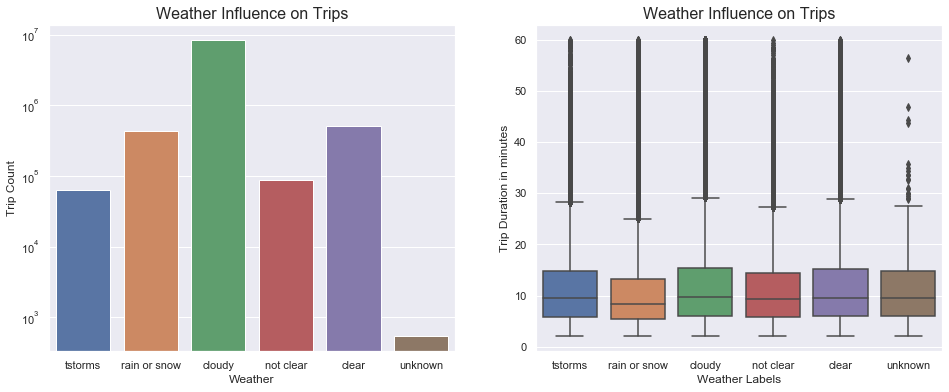

In [27]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='events', data=divvy, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Weather Influence on Trips', fontsize=16)
ax[0].set_xlabel('Weather', fontsize=12)
ax[0].set_ylabel('Trip Count', fontsize=12)
sns.boxplot(x='events', y='tripduration', data=divvy, ax=ax[1])
ax[1].set_title('Weather Influence on Trips', fontsize=16)
ax[1].set_xlabel('Weather Labels', fontsize=12)
ax[1].set_ylabel('Trip Duration in minutes', fontsize=12)
plt.show()

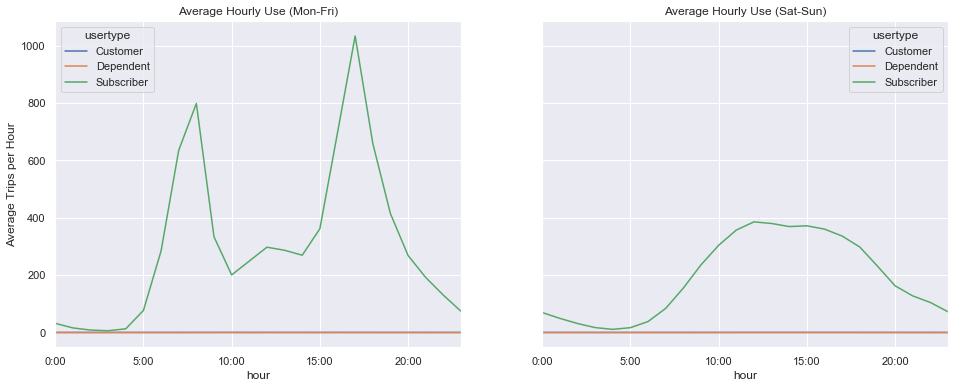

In [47]:
# count trips by date and by hour
hr = divvy.pivot_table('trip_id', aggfunc='count',
                            index=['date', 'hour'],
                            columns='usertype').fillna(0).reset_index('hour');

# average these counts by weekend
hr['weekend'] = (hr.index.dayofweek >= 5)
hr = hr.groupby(['weekend', 'hour']).mean()
hr.index.set_levels([['weekday', 'weekend'],
                          ["{0}:00".format(i) for i in range(24)]],
                         inplace=True);


#plot graphs

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
hr.loc['weekday'].plot(title='Average Hourly Use (Mon-Fri)', ax=ax[0])
hr.loc['weekend'].plot(title='Average Hourly Use (Sat-Sun)', ax=ax[1])
ax[0].set_ylabel('Average Trips per Hour');


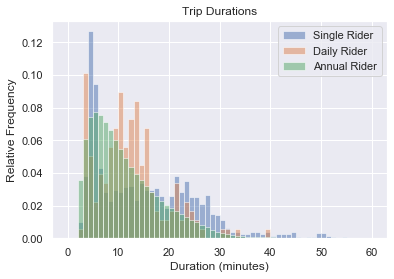

In [23]:
#convert trip duration feature to minutes 
divvy['minutes'] = divvy.tripduration  


#specify groups by member type and minutes to plot graph
divvy.groupby('usertype')['minutes'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('Relative Frequency')
plt.title('Trip Durations')

plt.legend(['Single Rider', 'Daily Rider', 'Annual Rider'])

In [5]:
folium_map = folium.Map(location=[41.8781, -87.6298],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')

#cluster station lat, longs and map 
FastMarkerCluster(data=list(zip(divvy2['latitude_start'].values, divvy2['longitude_start'].values))).add_to(folium_map)

folium.LayerControl().add_to(folium_map)
folium_map

In [6]:
locations = divvy2[['latitude_start', 'longitude_start']]
locationlist = locations.values.tolist()
len(locationlist)
locations.head(10)

,latitude_start,longitude_start
0,41.939365,-87.668385
1,41.864580,-87.646930
2,41.921687,-87.653714
3,41.877749,-87.649633
4,41.872187,-87.661501
5,41.933341,-87.648747
6,41.882091,-87.639833
7,41.891738,-87.626937
8,41.961626,-87.674101
9,41.874337,-87.639566


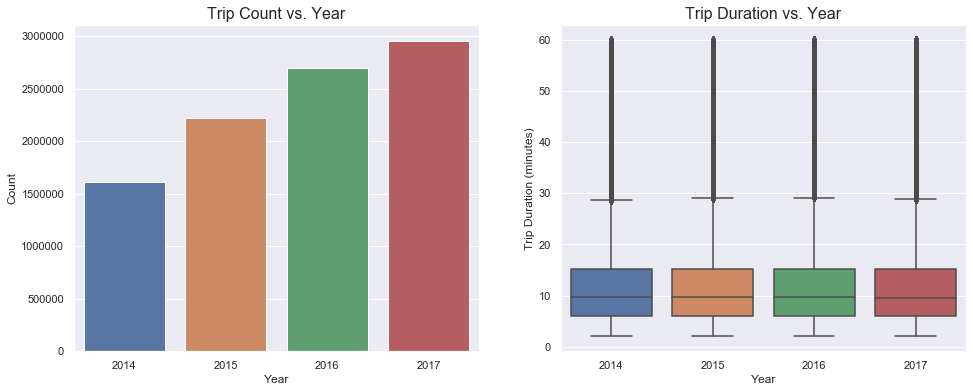

/Users/yasminbuzari/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


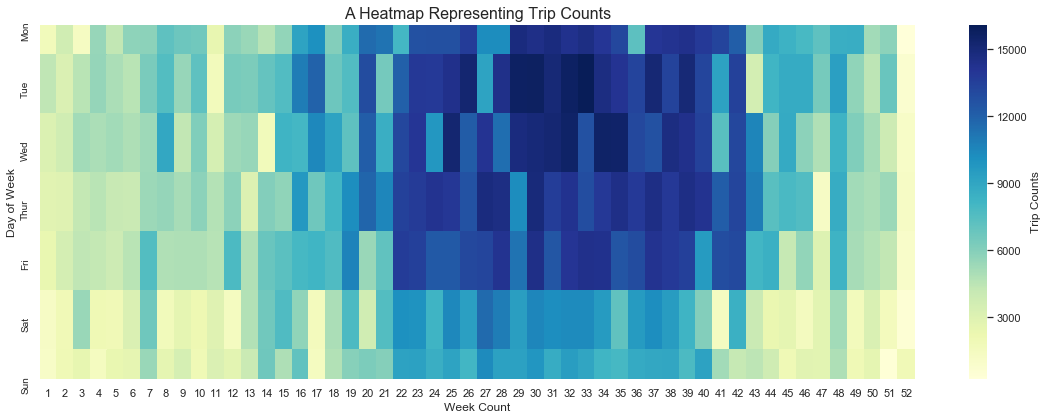

In [49]:
# Get names of indexes for which column Age has value 30
indexNames = divvy2017[ divvy2017['year'] == 2014 ].index
indexNames1 = divvy2017[ divvy2017['year'] == 2015 ].index
indexNames2 = divvy2017[ divvy2017['year'] == 2016 ].index
 
# Delete these row indexes from dataFrame
divvy2017.drop(indexNames , inplace=True)
divvy2017.drop(indexNames1 , inplace=True)
divvy2017.drop(indexNames2 , inplace=True)


divvy2017.head(10)
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='year', data=divvy, ax=ax[0])
ax[0].set_title('Trip Count vs. Year', fontsize=16)
ax[0].set_xlabel('Year', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x='year', y='tripduration', data=divvy, ax=ax[1])
ax[1].set_title('Trip Duration vs. Year', fontsize=16)
ax[1].set_xlabel('Year', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()

divvy2['tripduration'] = divvy2['tripduration'] / 60.0

# heatmap of trip count vs. (weekday and week no.)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = divvy2017[['day', 'week', 'tripduration']].groupby(['day', 'week']).count().reset_index()
pivots = tmp.pivot('day', 'week', 'tripduration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'}, cmap="YlGnBu")
ax.set_title('A Heatmap Representing Trip Counts', fontsize=16)
ax.set_xlabel('Week Count', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'), fontsize=10)
plt.tight_layout()
plt.show()

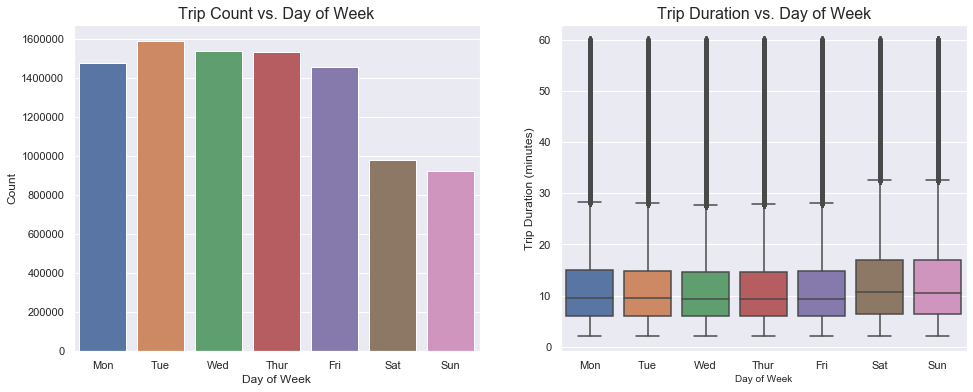

In [8]:

# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='day', data=divvy, ax=ax[0])
ax[0].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
ax[0].set_title('Trip Count vs. Day of Week', fontsize=16)
ax[0].set_xlabel('Day of Week', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.boxplot(x='day', y='tripduration', data=divvy, ax=ax[1])
ax[1].set_title('Trip Duration vs. Day of Week', fontsize=16)
ax[1].set_xlabel('Day of Week', fontsize=10)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

In [9]:
# Get names of indexes for which column Age has value 30
indexNames = divvy2017[ divvy2017['year'] == 2014 ].index
indexNames1 = divvy2017[ divvy2017['year'] == 2015 ].index
indexNames2 = divvy2017[ divvy2017['year'] == 2016 ].index
 
# Delete these row indexes from dataFrame
divvy2017.drop(indexNames , inplace=True)
divvy2017.drop(indexNames1 , inplace=True)
divvy2017.drop(indexNames2 , inplace=True)


divvy2017.head(10)


,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
6537545,13518905,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:59:07,2017-04-01 00:13:24,14.283333,37.9,cloudy,66,Clinton St & Lake St,41.885637,-87.641823,23.0,171,May St & Cullerton St,41.855136,-87.654127,11.0
6537546,13518904,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:56:25,2017-04-01 00:00:21,3.933333,37.9,cloudy,199,Wabash Ave & Grand Ave,41.890912,-87.626804,15.0,26,McClurg Ct & Illinois St,41.891020,-87.617300,31.0
6537547,13518903,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:55:33,2017-04-01 00:01:21,5.800000,37.9,cloudy,520,Greenview Ave & Jarvis Ave,42.015962,-87.668570,23.0,432,Clark St & Lunt Ave,42.009074,-87.674190,19.0
6537548,13518902,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:54:46,2017-03-31 23:59:34,4.800000,37.9,cloudy,110,Dearborn St & Erie St,41.893992,-87.629318,23.0,142,McClurg Ct & Erie St,41.894503,-87.617854,31.0
6537549,13518901,2017,3,13,4,23,Subscriber,Female,2017-03-31 23:53:33,2017-04-01 00:00:28,6.916667,37.9,cloudy,327,Sheffield Ave & Webster Ave,41.921540,-87.653818,19.0,331,Halsted St & Blackhawk St (*),41.908537,-87.648627,20.0
6537550,13518900,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:51:17,2017-03-31 23:55:19,4.033333,37.9,cloudy,143,Sedgwick St & Webster Ave,41.922167,-87.638888,15.0,289,Wells St & Concord Ln,41.912133,-87.634656,19.0
6537551,13518899,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:51:16,2017-03-31 23:57:17,6.016667,37.9,cloudy,81,Daley Center Plaza,41.884241,-87.629634,39.0,41,Federal St & Polk St,41.872078,-87.629544,19.0
6537552,13518898,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:50:26,2017-03-31 23:56:20,5.900000,37.9,cloudy,56,Desplaines St & Kinzie St,41.888716,-87.644448,27.0,77,Clinton St & Madison St,41.882242,-87.641066,31.0
6537553,13518897,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:50:25,2017-03-31 23:55:24,4.983333,37.9,cloudy,210,Ashland Ave & Division St,41.903450,-87.667747,19.0,69,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0
6537554,13518896,2017,3,13,4,23,Subscriber,Male,2017-03-31 23:49:58,2017-04-01 00:09:31,19.550000,37.9,cloudy,117,Wilton Ave & Belmont Ave,41.940180,-87.653040,23.0,29,Noble St & Milwaukee Ave,41.900680,-87.662600,15.0


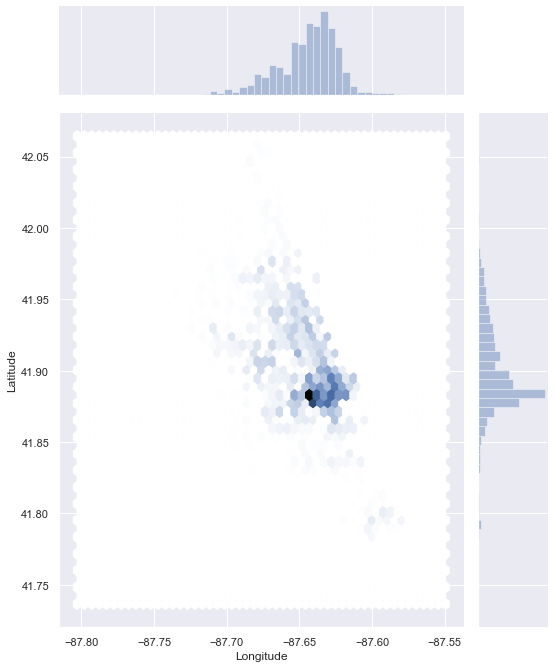

In [33]:

# trip start longitude and latitude distribution
g = sns.jointplot('longitude_start', 'latitude_start', divvy, kind='hex')

g.set_axis_labels('Longitude', 'Latitude')

g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

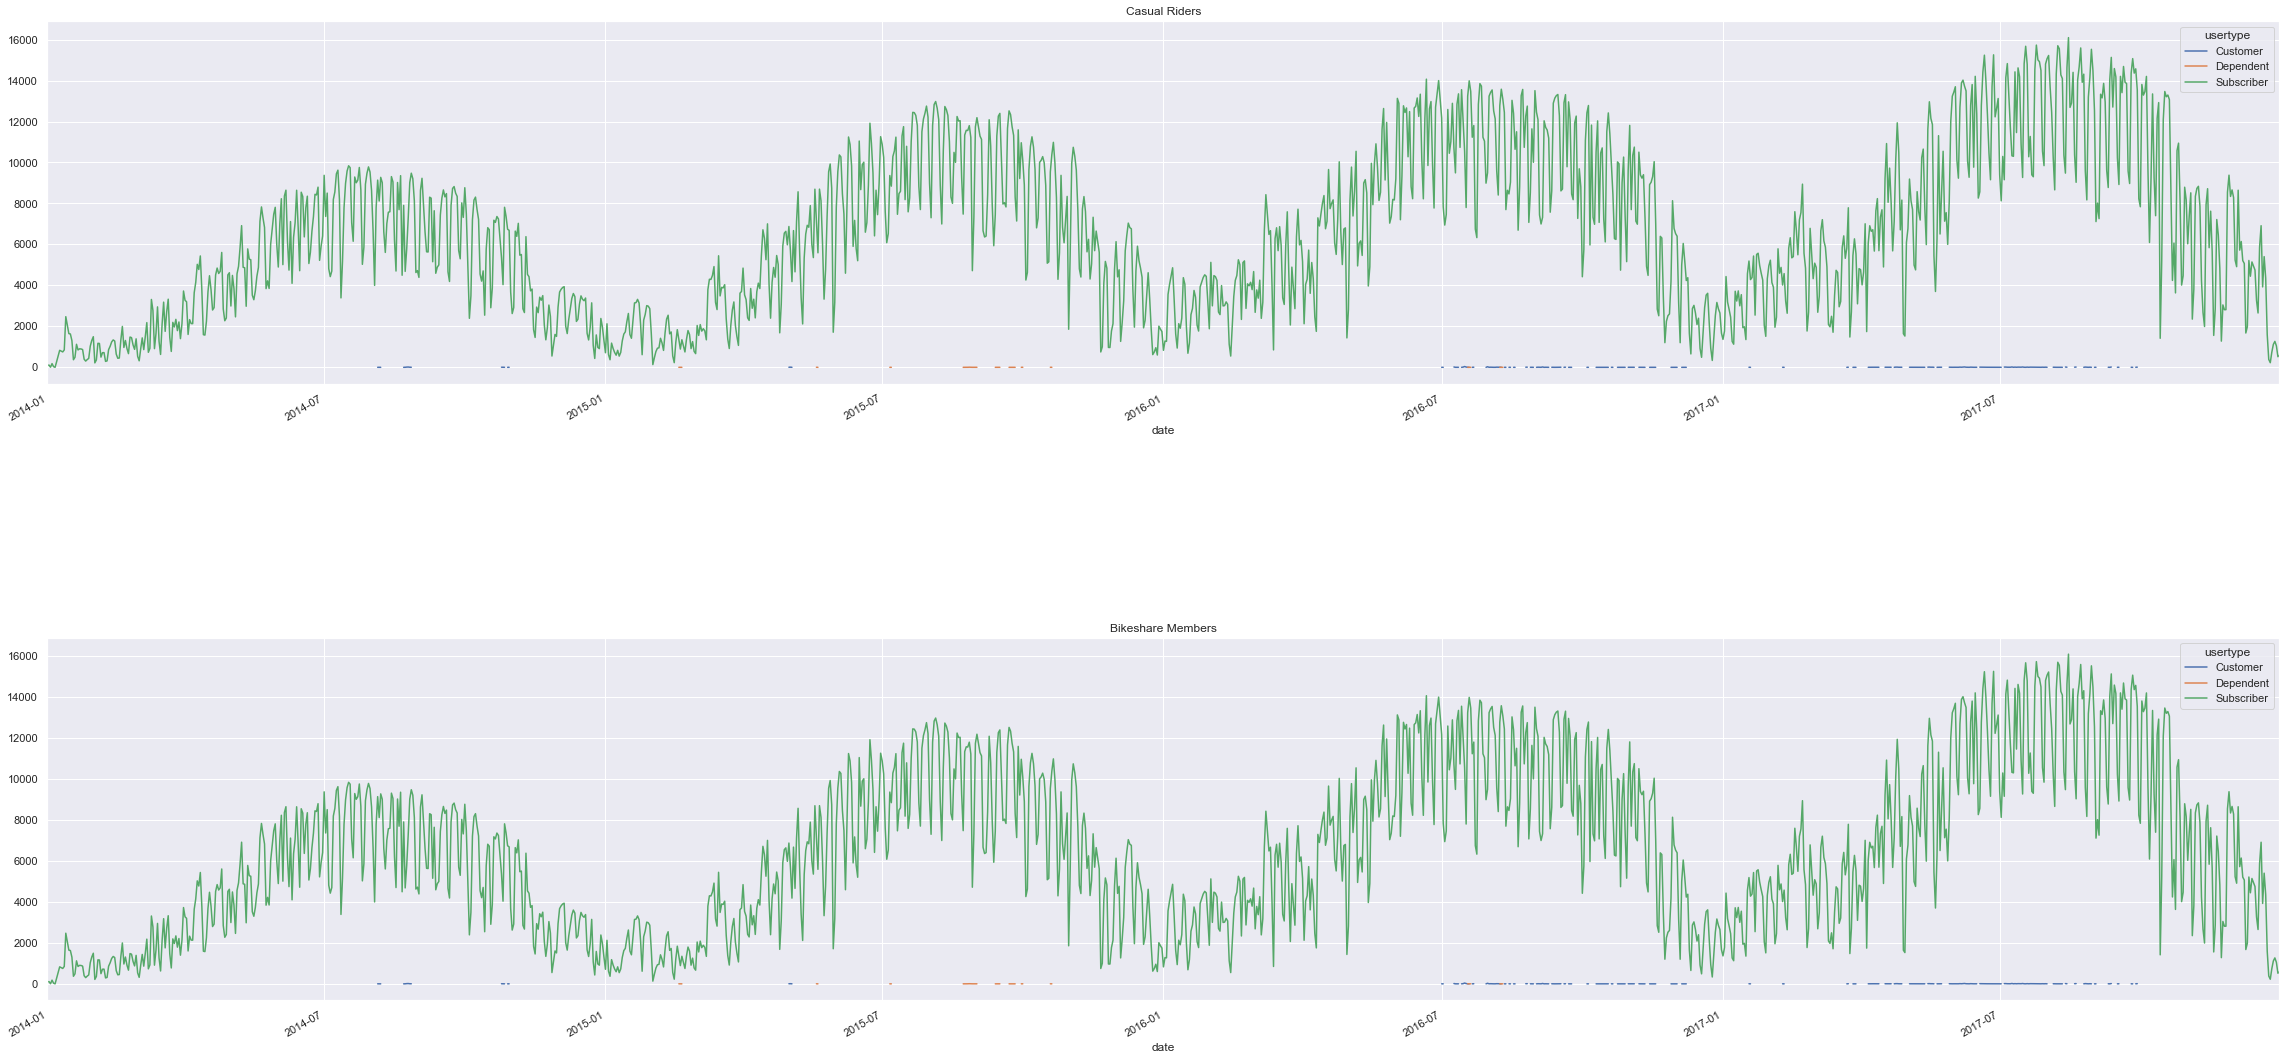

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Finding start date and set to sd1, set date and hour
sd1 = pd.DatetimeIndex(divvy['starttime'])
divvy['hour'] = sd1.hour
divvy['date'] = sd1.date.astype('datetime64')


# Count trips in main data frame to plot for y axis 
cdate = divvy.pivot_table('trip_id', aggfunc='count',
                            index='date',
                            columns='usertype', )

#plot sublots for each class, adjust spacing
fig, ax = plt.subplots (2, figsize=(40, 20))
fig.subplots_adjust(hspace=0.7)

#iloc to plot memebers and casual riders
cdate.plot(ax=ax[1], title='Bikeshare Members');
cdate.plot(ax=ax[0], title='Casual Riders');


In [16]:
counts = divvy.filter(items=['starttime','usertype'])
daily_counts = counts.groupby('starttime').agg(sum)
daily_day = counts.groupby('starttime').agg(max)

daily_counts['workingday'] = daily_day['workingday']
daily_counts.head()

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
sns.set()

#sns.kdeplot(data);
sns.set(font_scale=1.5)
#sns.lmplot(data = divvy, x='temperature', y='tripduration',hue='workingday')
sns.lmplot(data = divvy, x='temperature', y='tripduration')
plt.show()

In [ ]:
 g = sns.jointplot("temperature", "tripduration", data=divvy2,
...                   kind="kde", space=0, color="g")

In [ ]:
# trip start longitude and latitude distribution
g = sns.jointplot('temperature', 'tripduration', divvy, kind='hex')
g.set_axis_labels('Trip Start Longitude', 'Trip Start Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

In [13]:
#heatmap with trips from 2014 - 2017 
from folium.plugins import HeatMap

def generateBaseMap(default_location=[41.8781, -87.6298], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = divvy[divvy.month>4].copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['latitude_start', 'longitude_start', 'count']].groupby(['latitude_start', 'longitude_start']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map


In [14]:

#heatmap with just 2017
FastMarkerCluster(data=list(zip(divvy2['latitude_start'].values, divvy2['longitude_start'].values))).add_to(base_map)

folium.LayerControl().add_to(base_map)

base_map


In [ ]:
#heatmap with just 2014 
